In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

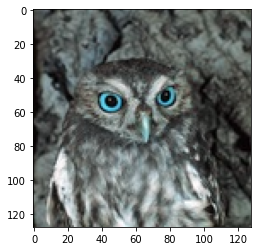

In [54]:
img = cv2.imread('small_owl.jpg')
imgGRAY=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgRGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

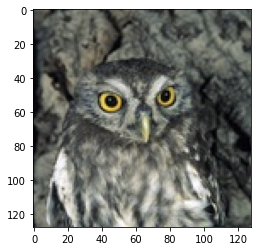

In [35]:
plt.imshow(imgRGB)# esto pasa ya que plt.imshow sabe que los canales estan en RGB en ligar de BGR, ojo por que esto puede causar errores.

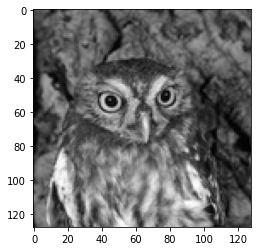

In [36]:
plt.imshow(imgGRAY,cmap = 'gray')#plt.imshow aplica un 

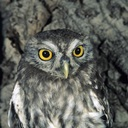

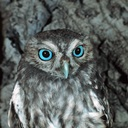

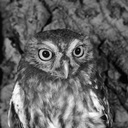

In [37]:
# For Google Colab only! cv2_imshow() 
from google.colab.patches import cv2_imshow
# para otros entornos locales puede cambiar cv2_imshow por cv2.imshow y poner un cv2.waitKey(0) al final
cv2_imshow(img)
cv2_imshow(imgRGB)
cv2_imshow(imgGRAY)

In [38]:
#acceder a un canal en un pixel
pixelB=img[0,0,0]
pixelG=img[0,0,1]
pixelR=img[0,0,2]
print(type(pixel))
print("B:",pixelB," G:",pixelG," R:",pixelR)
pixelB=imgRGB[0,0,2]#cambiar por imgGRAY
pixelG=imgRGB[0,0,1]
pixelR=imgRGB[0,0,0]
print(type(pixel))
print("B:",pixelB," G:",pixelG," R:",pixelR)

<class 'numpy.uint8'>
B: 82  G: 84  R: 78
<class 'numpy.uint8'>
B: 82  G: 84  R: 78


In [52]:
# El tamaño de la imagen esta en el método .shape
print("img",img.shape)
print("imgRGB",imgRGB.shape)
print("imgGRAY",imgGRAY.shape)

img (128, 128)
imgRGB (128, 128, 3)
imgGRAY (128, 128)


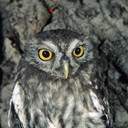

In [55]:
img[10,50]=(0,0,255)#por favor note que primero va la fila y luego la columna
img[11,50]=(0,0,255)
img[10,51]=(0,0,255)
img[11,51]=(0,0,255)
cv2_imshow(img)

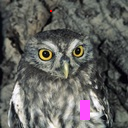

In [57]:
img[100:120,80:90]=[255,80,255]#se puede usar una notacion más pitonica para lograr modificar secciones rectangulares
cv2_imshow(img)

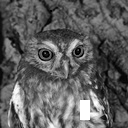

In [58]:
imb, img, imr = cv2.split(img)
img2 = cv2.merge([imb, imb, imb])
cv2_imshow(img2)

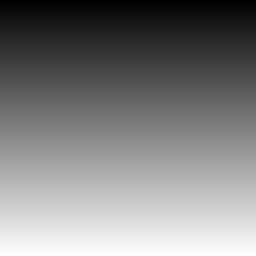

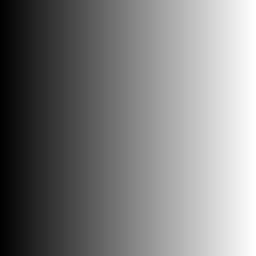

In [59]:
#se pueden crear matrices en blanco o imagenes desde ceros!!
gray1 = np.zeros( (256,256), dtype="uint8" )
gray2 = np.zeros( (256,256), dtype="uint8" )
for i in range(256):
  gray1[i,:] = i
  gray2[:,i] = i
gray1=gray1.astype("uint8")
gray2=gray2.astype("uint8")
cv2_imshow(gray1)
cv2_imshow(gray2)

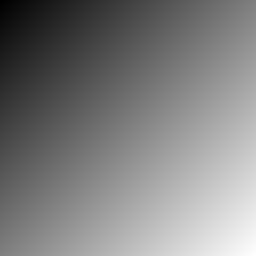

In [60]:
gray3 = np.zeros( (256,256), dtype="uint8" )
for i in range(256):
  for j in range(256):
    gray3[i,j]= (i*0.5 + j*0.5)
gray3=gray3.astype("uint8")
cv2_imshow(gray3)

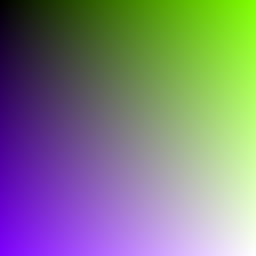

In [61]:
img4 = cv2.merge([gray1, gray2, gray3])
cv2_imshow(img4)

In [65]:
#Loops mas rápidos en python usando C "Cython"
def Umbral_super_lento_pero_facil_de_entender(T, image):
    h = image.shape[0]
    w = image.shape[1]
    for y in range(0, h):
        for x in range(0, w):
            # threshold
            image[y, x] = 255 if image[y, x] >= T else 0
    return image

10 loops, best of 3: 32 ms per loop


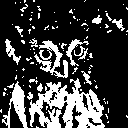

In [73]:
%timeit  Umbral_super_lento_pero_facil_de_entender(128, imgGRAY) # ver https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.03-Magic-Commands.ipynb
umbral=Umbral_super_lento_pero_facil_de_entender(128, imgGRAY)
cv2_imshow(umbral)

In [84]:
#Probado en google colab 
%load_ext Cython
# en PC propio
#%%cython -a
#import cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [91]:
# bucle más rápido usando cython, si tienen que montar algo mas complicado que esto usen C o C++ :P
%%cython
import cython
@cython.boundscheck(False)
cpdef unsigned char[:, :] umbral_rapido(int T, unsigned char [:, :] image):
    cdef int x, y, w, h
    h = image.shape[0]
    w = image.shape[1]
    for y in range(0, h):
        for x in range(0, w):
            image[y, x] = 255 if image[y, x] >= T else 0
    return image

In [92]:
%timeit umbral_rapido(128, imgGRAY)

10000 loops, best of 3: 22.6 µs per loop


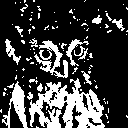

In [97]:
umbral2=umbral_rapido(128, imgGRAY)
cv2_imshow(np.asarray(umbral2))#toca usar https://numpy.org/doc/stable/reference/generated/numpy.asarray.html para que imshow lo interpete bien

In [98]:
def threshold_numpy(T, image):
  image[image > T] = 255
  return image

In [100]:
%timeit threshold_numpy(128, imgGRAY)

10000 loops, best of 3: 36.4 µs per loop


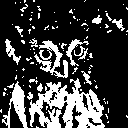

In [101]:
cv2_imshow(imgGRAY)